In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl

# Set default parameters
mpl.rcParams['xtick.bottom'] = False
mpl.rcParams['ytick.left'] = False
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

sns.set_style('white')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [32]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [33]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [34]:
df.shape

(4746, 12)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [36]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [37]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [38]:
df.describe().round(3)

,BHK,Rent,Size,Bathroom
count,4746.000,4746.000,4746.000,4746.000
mean,2.084,34993.451,967.491,1.966
std,0.832,78106.413,634.202,0.885
min,1.000,1200.000,10.000,1.000
25%,2.000,10000.000,550.000,1.000
50%,2.000,16000.000,850.000,2.000
75%,3.000,33000.000,1200.000,2.000
max,6.000,3500000.000,8000.000,10.000


In [39]:
df['Floor'].value_counts().index[270:290]

Index(['17 out of 29', '13 out of 16', '18 out of 21', '19 out of 24',
       '3 out of 21', '1 out of 22', '4 out of 58', '19 out of 21',
       '9 out of 40', '44 out of 75', '12 out of 31', '26 out of 42',
       '2 out of 45', '12 out of 68', '10 out of 28', '41 out of 41',
       '14 out of 68', '60 out of 66', '34 out of 48', '14 out of 40'],
      dtype='object', name='Floor')

In [40]:
# Splitting the floor and Total num of floors.

def split_floor(row):
    str = row['Floor'].split(' ')
    row['Total Floor'] = str[-1]
    row['Floor'] = str[0]
    return row

df = df.apply(split_floor, axis=1)
df.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floor
0,2022-05-18,2,10000,1100,Ground,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3


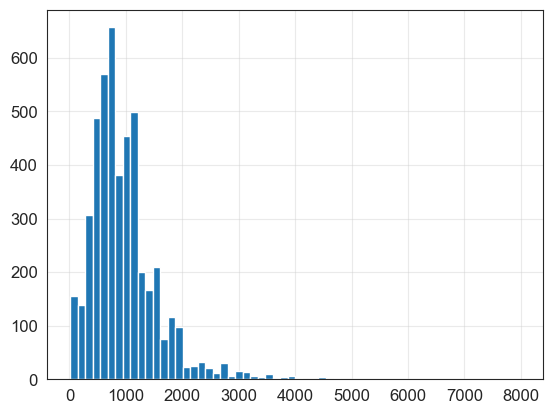

In [41]:
## Univariate Analysis
df['Size'].hist(bins=60)
plt.grid(alpha=0.4)

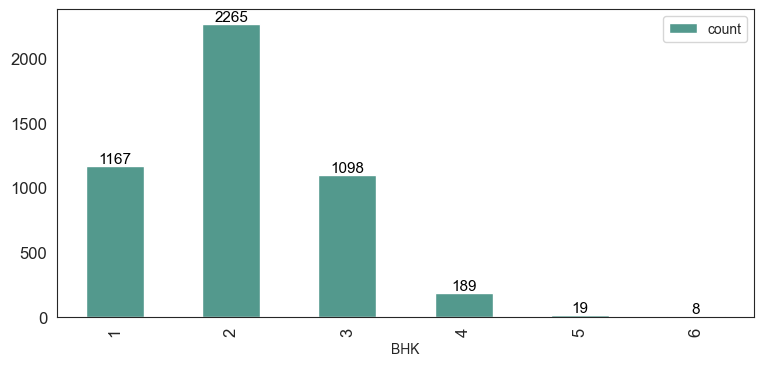

In [42]:
df2 = df['BHK'].value_counts().reset_index().sort_values(by='BHK')
ax = df2.plot(x='BHK',kind='bar',
                             figsize=(9,4), color='#53998d')
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + 0.25, p.get_height()),
        color='black',
        fontsize=11, ha='center', va='bottom'
    )

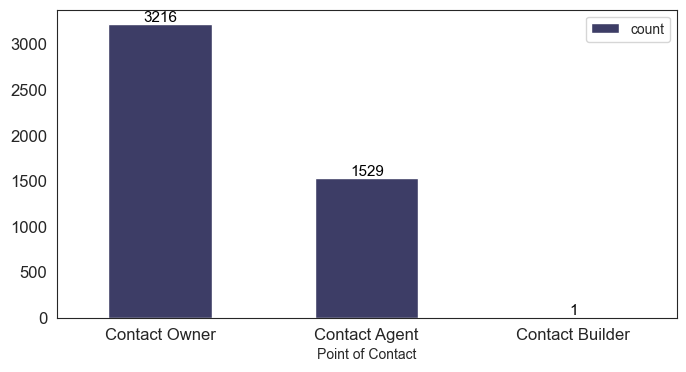

In [43]:
df2 = df['Point of Contact'].value_counts().reset_index()
ax = df2.plot(x='Point of Contact',kind='bar',
                             figsize=(8,4), color='#3d3d66')
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + 0.25, p.get_height()),
        color='black',
        fontsize=11, ha='center', va='bottom'
    )
plt.xticks(rotation=0);

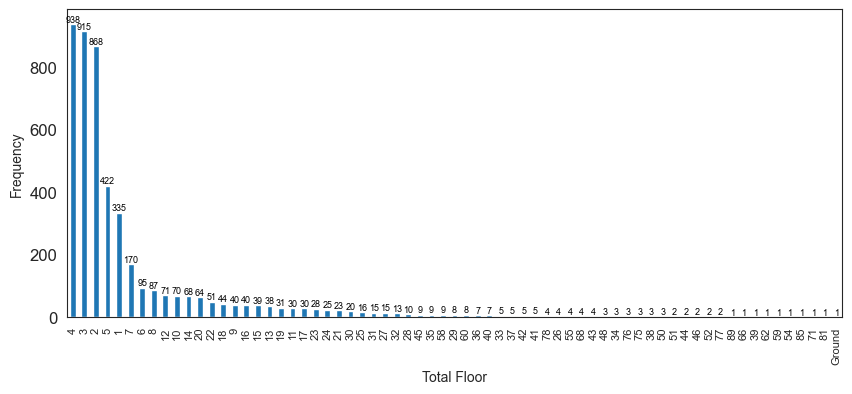

In [44]:
ax = df['Total Floor'].value_counts().plot(kind='bar',
                            figsize=(10,4));
plt.xticks(fontsize=8);
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + 0.25, p.get_height()),
        color='black',
        fontsize=6.5, ha='center', va='bottom'
    )

ax.set_ylabel('Frequency');

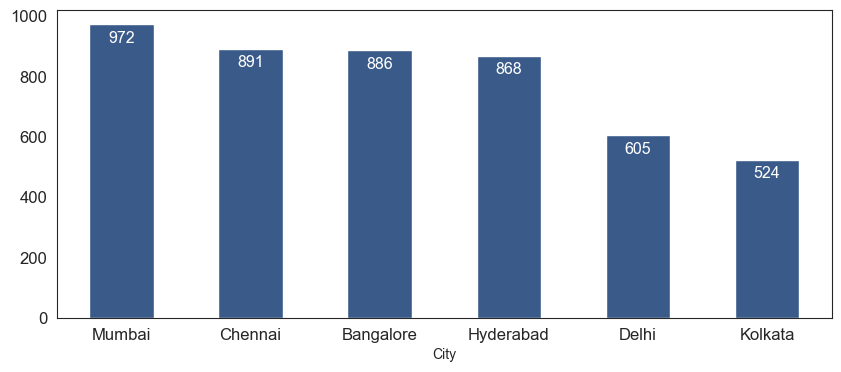

In [45]:
plt.figure(figsize=(10,4))
ax = df['City'].value_counts().plot(kind='bar', color='#3a5b8a')

for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + 0.25, p.get_height()-70),
        color = 'white', ha='center', va='bottom', fontsize=11.5
    )
plt.xticks(fontsize=12, rotation=0);

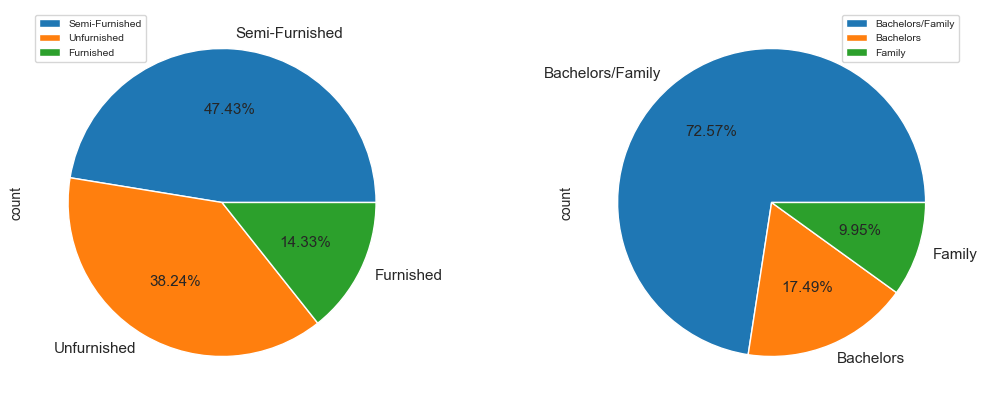

In [46]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
df2 = df['Furnishing Status'].value_counts()
ax = df2.plot(kind='pie', autopct='%1.2f%%', fontsize=11, explode=[0,0,0])
plt.legend(labels=df2.index, loc='upper left', fontsize=7.5)

plt.subplot(1,2,2)
df2 = df['Tenant Preferred'].value_counts()
df2.plot(kind='pie', autopct='%1.2f%%', fontsize=11)
plt.legend(labels=df2.index, loc='upper right', fontsize=7.5);

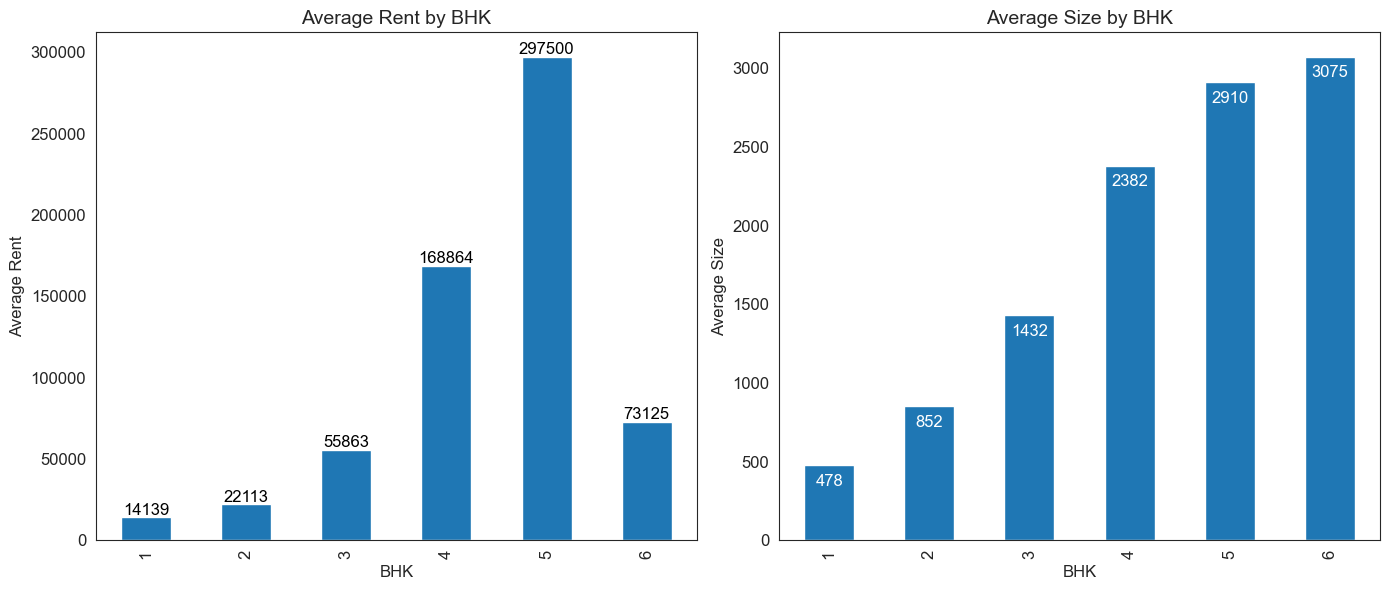

In [47]:
# Average rent and Average size of the house by BHK's
df2 = df[['BHK', 'Size', 'Rent']].groupby(['BHK']).mean().round(3)

plt.figure(figsize=(14, 6))

# Plot for Rent
plt.subplot(1, 2, 1)
ax = df2['Rent'].plot(kind='bar')
plt.title('Average Rent by BHK', fontsize=14)
plt.xlabel('BHK', fontsize=12)
plt.ylabel('Average Rent', fontsize=12)

for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + 0.25, p.get_height()-80),
        color = 'black', ha='center', va='bottom', fontsize=12)

# Plot for Size
plt.subplot(1, 2, 2)
ax = df2['Size'].plot(kind='bar')
plt.title('Average Size by BHK', fontsize=14)
plt.xlabel('BHK', fontsize=12)
plt.ylabel('Average Size', fontsize=12)

# Annotate the bars with height values
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height() - 150),
        ha='center', va='bottom', color='white', fontsize=12)

plt.tight_layout()

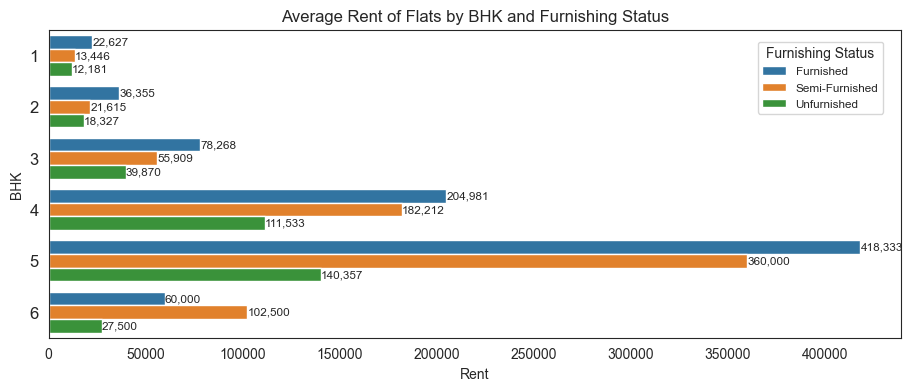

In [48]:
df2 = df[['Furnishing Status', 'BHK', 'Rent']].groupby(['Furnishing Status','BHK']).mean().round(0).reset_index()
plt.figure(figsize=(11,4))
ax = sns.barplot(data=df2,
           y = 'BHK',
           x = 'Rent',
           hue = 'Furnishing Status',
           orient = 'h')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f',labels=[f'{int(label):,}' for label in container.datavalues], label_type='edge', fontsize=8.5)

plt.title('Average Rent of Flats by BHK and Furnishing Status')
plt.legend(title='Furnishing Status', bbox_to_anchor=(0.825, 0.98), loc='upper left', fontsize=8.5)
plt.xticks(fontsize=10);

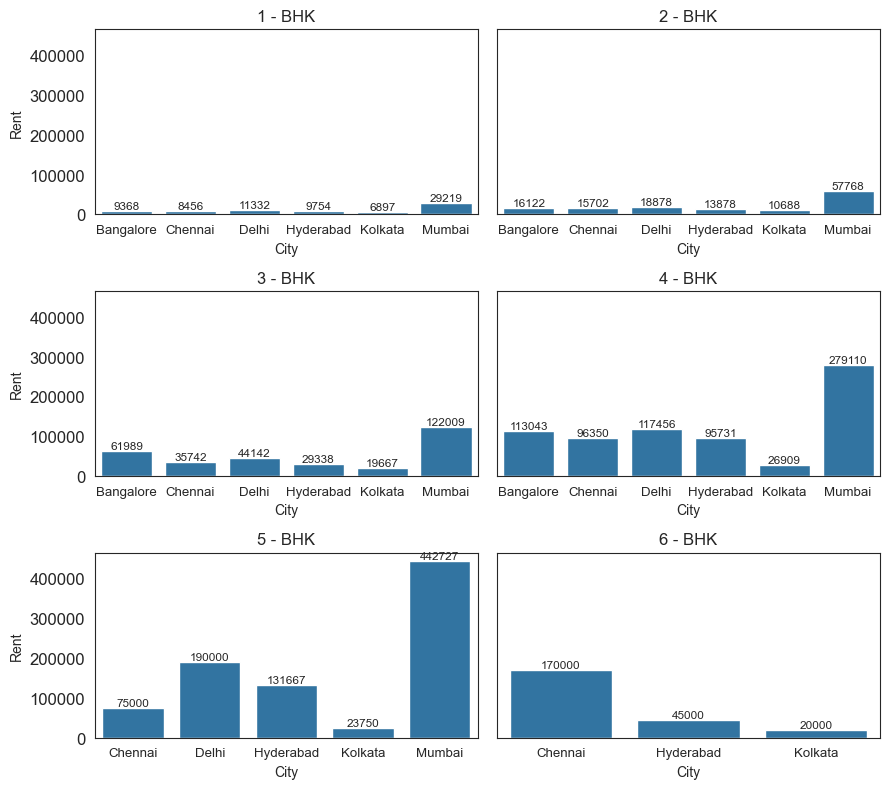

In [49]:
# Comparing the rent of plots in each city by BHKs

def plot(bhk, axes):
    dfx = df2[df2['BHK'] == bhk]
    sns.barplot(x='City', y='Rent', data=dfx, ax=axes)
    for container in axes.containers:
        axes.bar_label(container, label_type='edge', fontsize=8.5)
    axes.set_title(f'{bhk} - BHK')
    axes.tick_params(axis='x', labelsize=9.5)

df2 = df[['City', 'BHK', 'Rent']].groupby(['City','BHK']).mean().round(0).reset_index()

bhk = list(df2.BHK.unique())
# Create a 3x2 subplot
fig, axes = plt.subplots(3, 2, figsize=(9,8), sharey=True)
axes = axes.flatten()

for i in range(6):
    plot(bhk[i], axes[i])

plt.tight_layout()

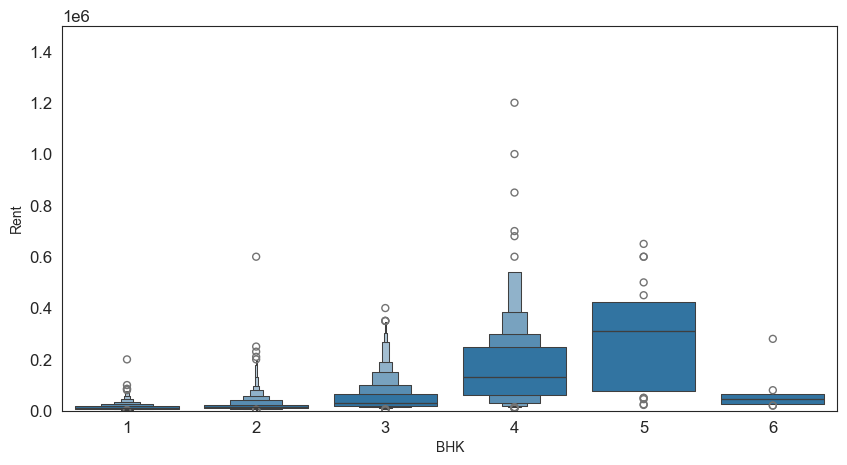

In [50]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df,
             x = 'BHK',
             y = 'Rent')

plt.ylim((0,1500000));

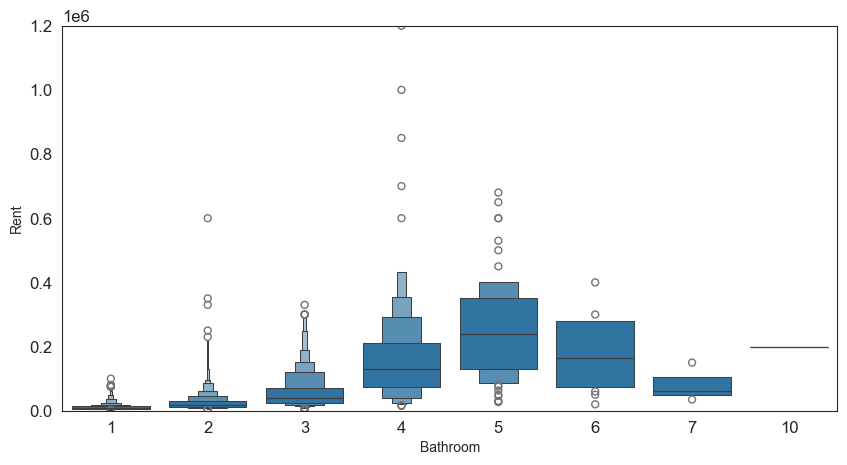

In [51]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df,
             x = 'Bathroom',
             y = 'Rent')

plt.ylim((0,1200000));

In [52]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [53]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(city, ax):
    df2 = df[df['City'] == city]['Area Locality'] 
    stopwords = set(STOPWORDS)
    comments = ''
    
    for word in df2:
        word = str(word.lower())
        tokens = word.split()
        comments += (" ".join(tokens) + " ")
    
    wordcloud = WordCloud(height=300, width=500, background_color='white', stopwords=stopwords, min_font_size=8).generate(comments)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(city)

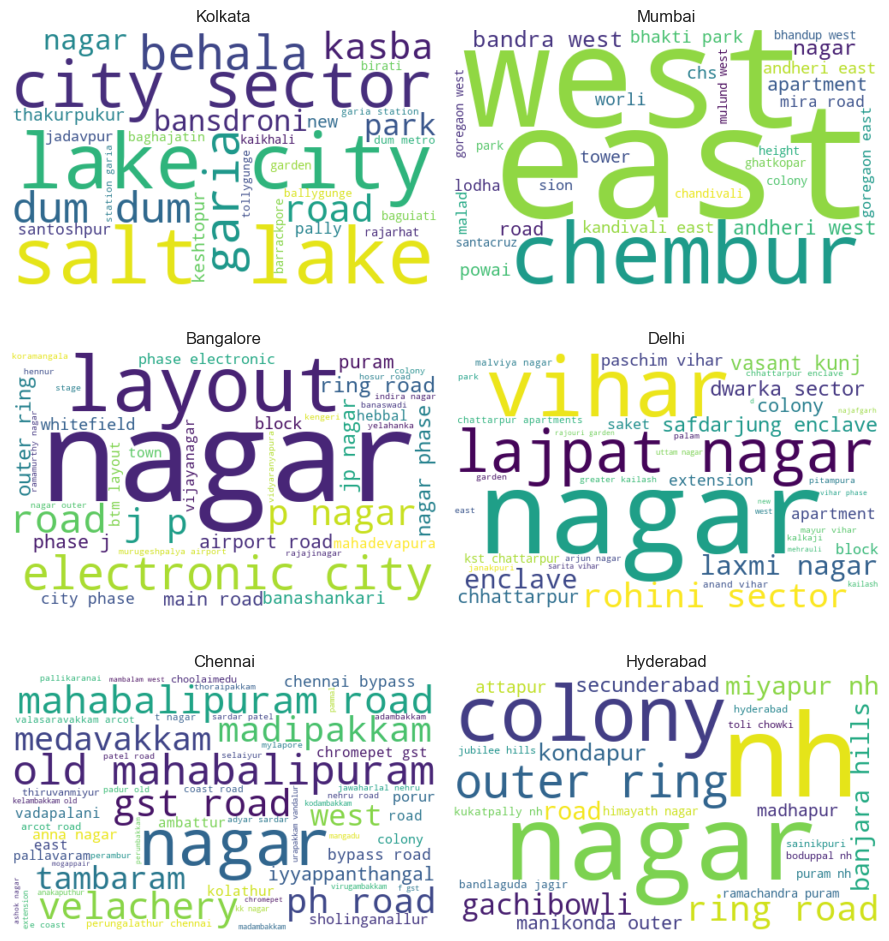

In [54]:
cities = list(df['City'].unique())

# Create a 3x2 subplot
fig, axes = plt.subplots(3, 2, figsize=(9,10))
axes = axes.flatten()

# Plot word clouds for the first 6 cities
for i in range(6):
    plot_wordcloud(cities[i], axes[i])

plt.tight_layout()

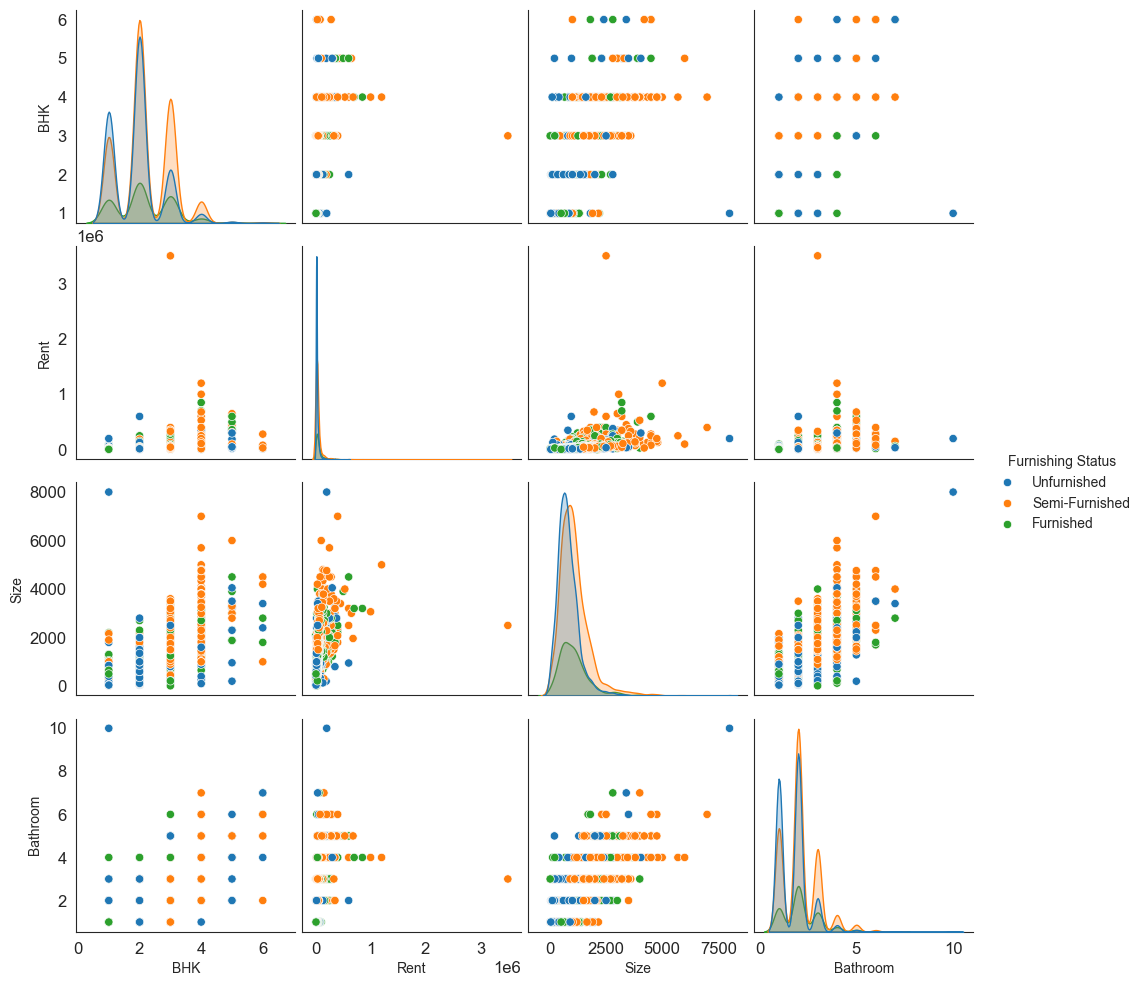

In [55]:
sns.pairplot(df, hue = 'Furnishing Status');

In [56]:
df.drop(['Posted On','Floor','Area Locality'], axis=1, inplace=True)
df2 = df

In [57]:
df = pd.get_dummies(df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])

In [93]:
df2.head()
# ['BHK', 'Size', Area Type', 'City', Furnishing Status', Tenant Preffered', Bathroom', Point of Contact', Total Floor']

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [60]:
df['Total Floor'].replace({'Ground':0}, inplace=True)
df['Total Floor'] = df['Total Floor'].astype('int')

In [89]:
y = df['Rent']
X = df.loc[:, df.columns != 'Rent']

In [96]:
import pickle
cols = X.columns
dummy_df = pd.DataFrame(columns=cols)

with open('dummy_df.pkl', 'wb') as f:
    pickle.dump(dummy_df, f)

### Fitting the Polynomial Linear Regression Model

In [62]:
X_train, X_sub, y_train, y_sub = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [63]:
X_cv, X_test, y_cv, y_test = train_test_split(X_sub, y_sub, test_size = 0.3, random_state = 42)

In [64]:
print(f'Shape of Training Set {X_train.shape}')
print(f'Shape of Cross-Validation Set {X_cv.shape}')
print(f'Shape of Testing Set {X_test.shape}')

Shape of Training Set (3322, 22)
Shape of Cross-Validation Set (996, 22)
Shape of Testing Set (428, 22)


In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

In [117]:
poly_regs= PolynomialFeatures(degree=2)  
x_poly = poly_regs.fit_transform(X_train)  
x_poly_test = poly_regs.transform(X_test) 
x_poly_cv = poly_regs.transform(X_cv)

In [68]:
# Save the models and preprocessing steps
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    
with open('poly_regs.pkl', 'wb') as f:
    pickle.dump(poly_regs, f)

In [69]:
lin_reg = LinearRegression()  
lin_reg.fit(x_poly, y_train)  

LinearRegression()

In [119]:
y_predict = lin_reg.predict(x_poly_cv)

In [71]:
lin_reg.coef_[:10]

array([-1.81360983e+11, -1.47437260e+10, -4.12012152e+11, -2.34922201e+11,
        8.16516497e+09, -4.36101729e+13, -2.15470948e+12, -2.43431969e+12,
       -1.39249548e+13, -1.44400515e+13])

In [72]:
lin_reg.intercept_

np.float64(-360984885651819.3)

In [73]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

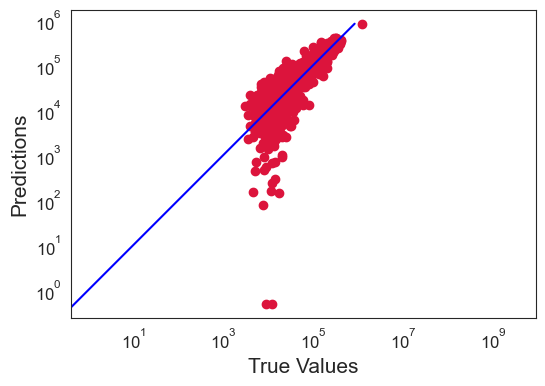

In [74]:
plt.figure(figsize=(6,4))
plt.scatter(y_cv, y_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<Axes: xlabel='Rent', ylabel='Density'>

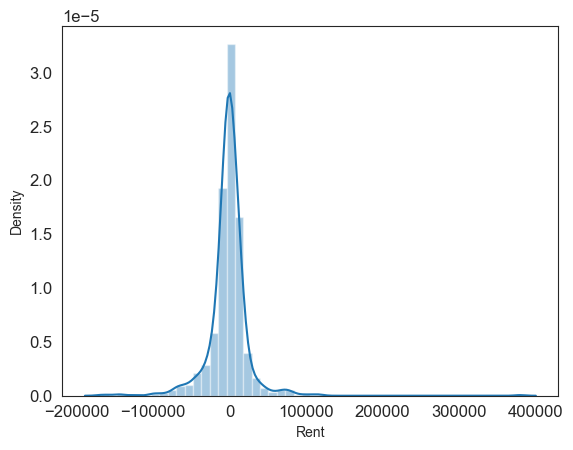

In [75]:
residuals = y_cv - y_predict
sns.distplot(residuals)

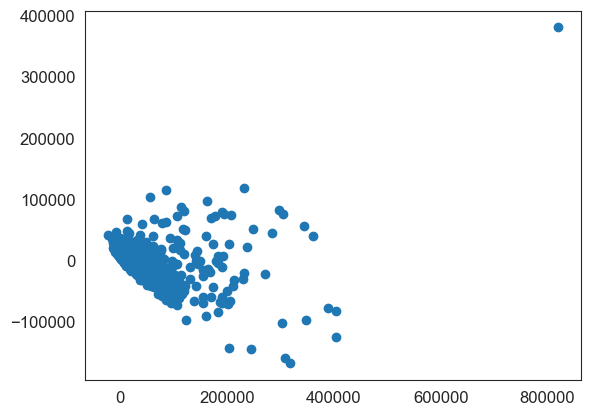

In [76]:
plt.scatter(y_predict, residuals)

In [77]:
print(f'Mean Squared Error {mean_squared_error(y_cv, y_predict)}')
print(f'Mean Absolute Error {mean_absolute_error(y_cv, y_predict)}')
print(f'Mean Squared Root Error {np.sqrt(mean_squared_error(y_cv, y_predict))}')

# R-Square and Adjusted R-Squared
score = r2_score(y_cv, y_predict)
print(f'R2 Score {score}')
print(f'R2 Adjusted Score {1 - (1 - score)*(len(y_cv)-1)/(len(y_cv)-X_cv.shape[1]-1)}')

Mean Squared Error 748051150.9038223
Mean Absolute Error 14900.319716365462
Mean Squared Root Error 27350.523777504193
R2 Score 0.8176238221788874
R2 Adjusted Score 0.8135002087029732


### Testing on Test/Unseen Data

In [78]:
test_predict = lin_reg.predict(x_poly_test)
test_predict[:10]

array([ 30723.5   ,  -6770.25  ,  12260.1875,  14898.375 ,   6699.5   ,
       111463.5625,  13759.4375,  18404.8125,  10067.3125,  10512.3125])

In [79]:
print(f'Mean Squared Error {mean_squared_error(y_test, test_predict)}')
print(f'Mean Absolute Error {mean_absolute_error(y_test, test_predict)}')
print(f'Mean Squared Root Error {np.sqrt(mean_squared_error(y_test, test_predict))}')

# R-Square and Adjusted R-Squared
score = r2_score(y_test, test_predict)
print(f'R2 Score {score}')
print(f'R2 Adjusted Score {1 - (1 - score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')

Mean Squared Error 747689570.3130202
Mean Absolute Error 14275.87280957944
Mean Squared Root Error 27343.91285666739
R2 Score 0.6518631535358794
R2 Adjusted Score 0.6329520161970877


### EXPORTING THE MODEL

In [80]:
import pickle

In [81]:
pickle.dump(lin_reg, open("regmodel.pkl",'wb'))

In [82]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [97]:
scalar = pickle.load(open('scaler.pkl','rb'))
regression = pickle.load(open('regmodel.pkl','rb'))
poly_transformation = pickle.load(open('poly_regs.pkl','rb'))
dummy_df = pickle.load(open('dummy_df.pkl','rb'))

In [100]:
input = [1,480,'Carpet Area','Mumbai','Semi-Furnished','Bachelors',1,'Contact Owner',4]
cols = ['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preffered', 'Bathroom', 'Point of Contact', 'Total Floor']

In [124]:
df_new = pd.DataFrame([input], columns=cols)
df_new = pd.get_dummies(df_new)

# X.head(1)

,BHK,Size,Bathroom,Total Floor,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,1100,2,2,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True


In [126]:
df_new = df_new.reindex(columns=dummy_df.columns, fill_value=False)

In [142]:
df_new_scaled = scaler.transform(df_new)
x_poly_new = poly_regs.transform(df_new_scaled)
prediction = lin_reg.predict(x_poly_new)
prediction

array([-3.10302521e+14])